### Import basic modules

In [156]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [157]:
# df = pd.read_csv('data/Dataset.csv')

### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [158]:
# import modules.cleansing as cl

# df = cl.remove_columns(df, ['PATIENT_TYPE'])
# df = cl.remove_invalid_values(df)
# df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
# df_original = df.copy()
# df = cl.remove_outliers(df, 'AGE')
# df = cl.impute_missing_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE'])

In [159]:
# df.to_csv('data/Dataset_revised_new.csv', index=False)
# df_original.to_csv('data/Dataset_revised_org.csv', index=False)
# df.describe()

### II/ Descriptive Statistics and Data Visualisation: 
 


In [160]:
df_original = pd.read_csv('data/Dataset_revised_org.csv')
df = pd.read_csv('data/Dataset_revised_new.csv')

/tmp/ipykernel_818609/2795104614.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('data/Dataset_revised_org.csv')


In [161]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df = df[new_column_list].copy()
analytics_df

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194338,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
194339,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
194340,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
194341,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


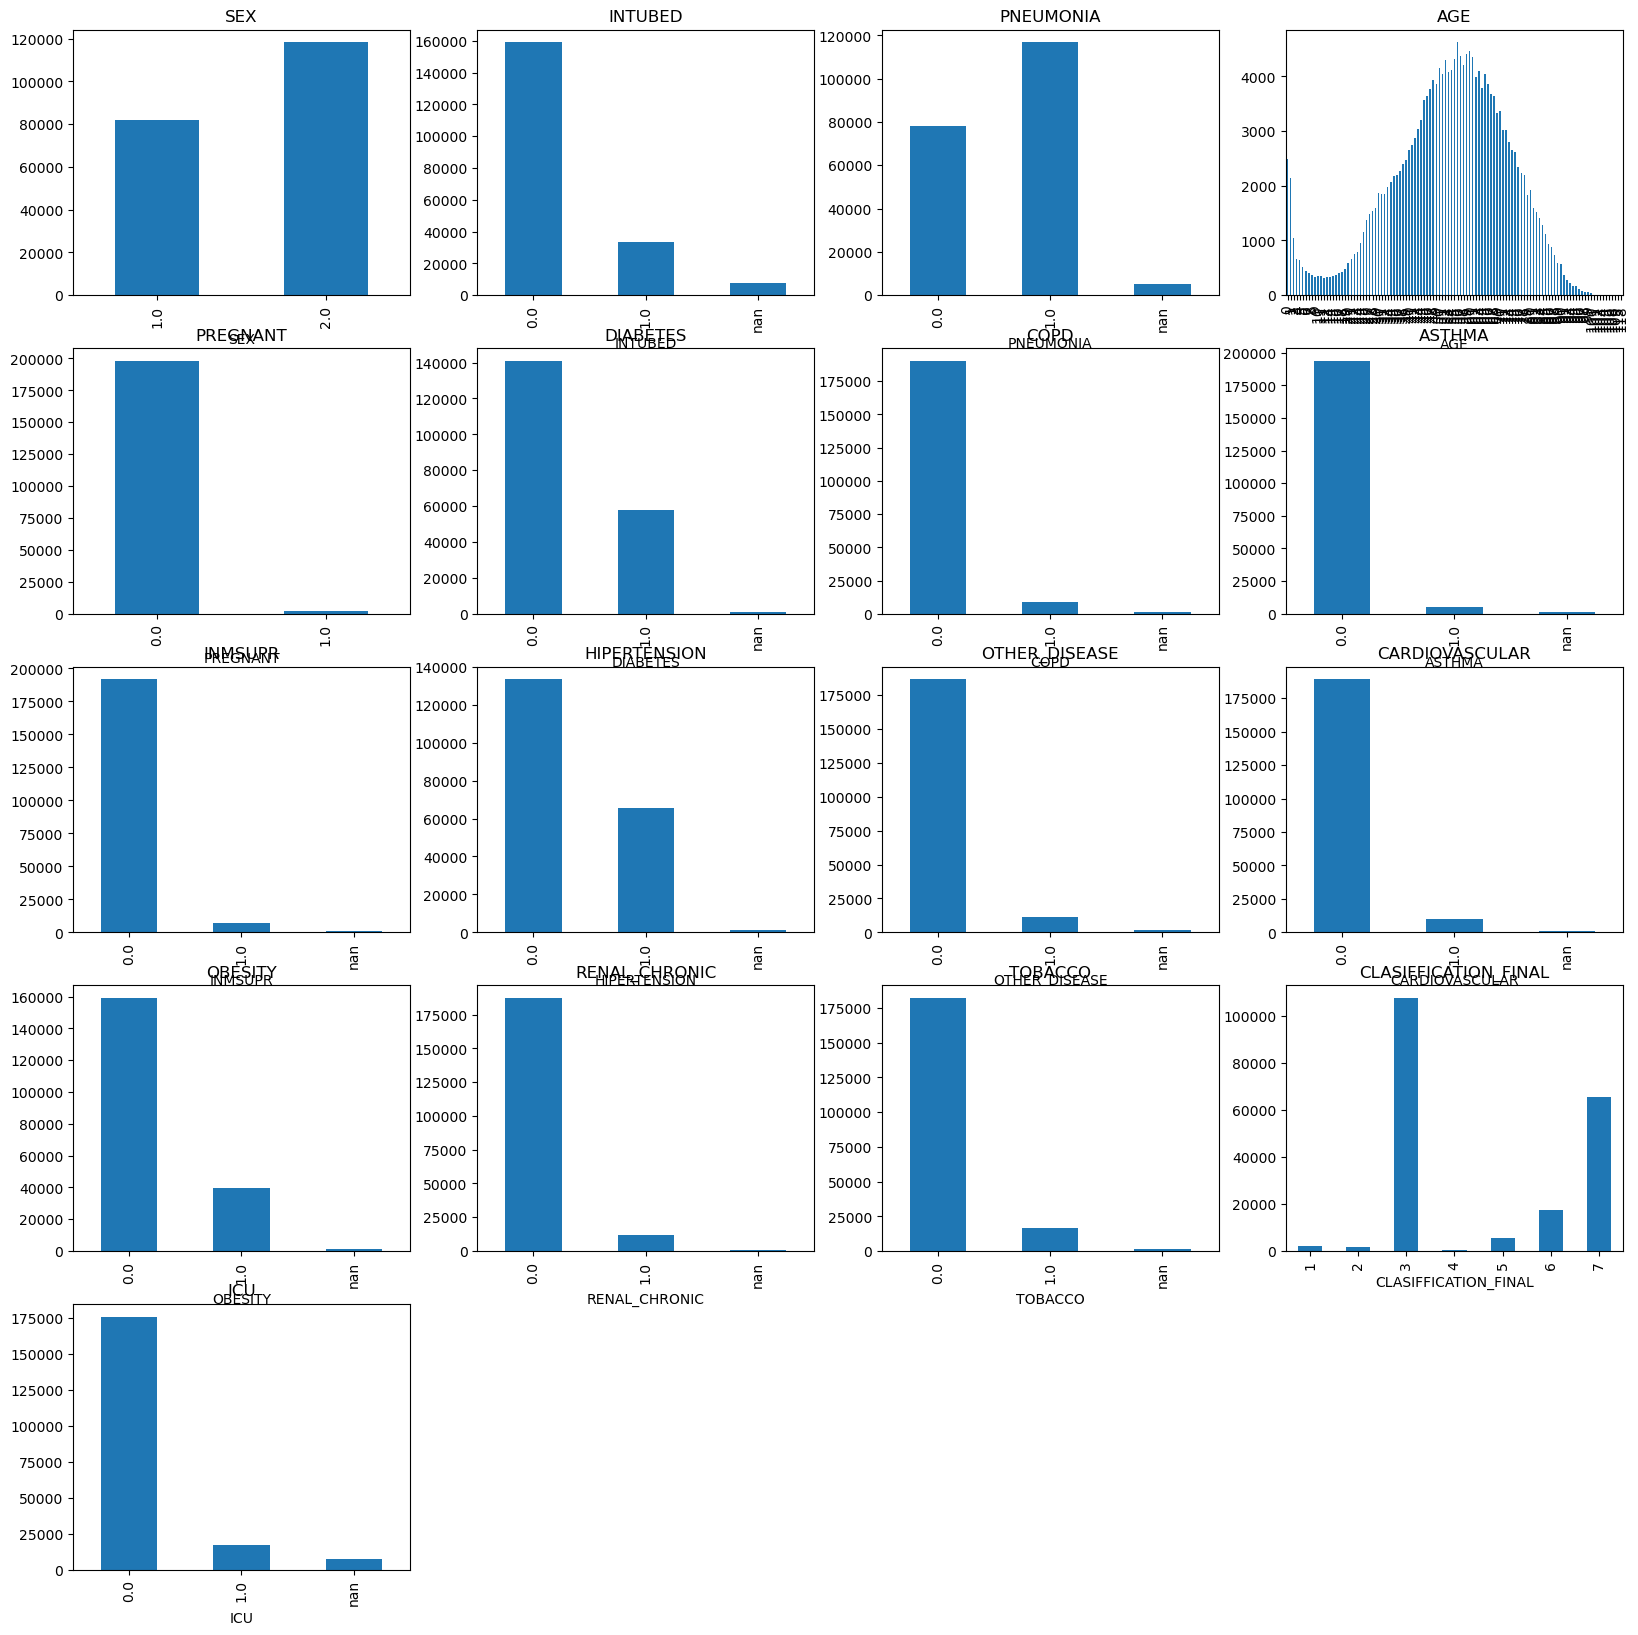

In [162]:
import modules.analytics_helper as ah

org_analytics_df = df_original[new_column_list].copy()
# analytics_df
# print(org_analytics_df['PNEUMONIA'])

ah.plot_multiple_metrics(df=org_analytics_df, columns=new_column_list, figsize=(20, 20))

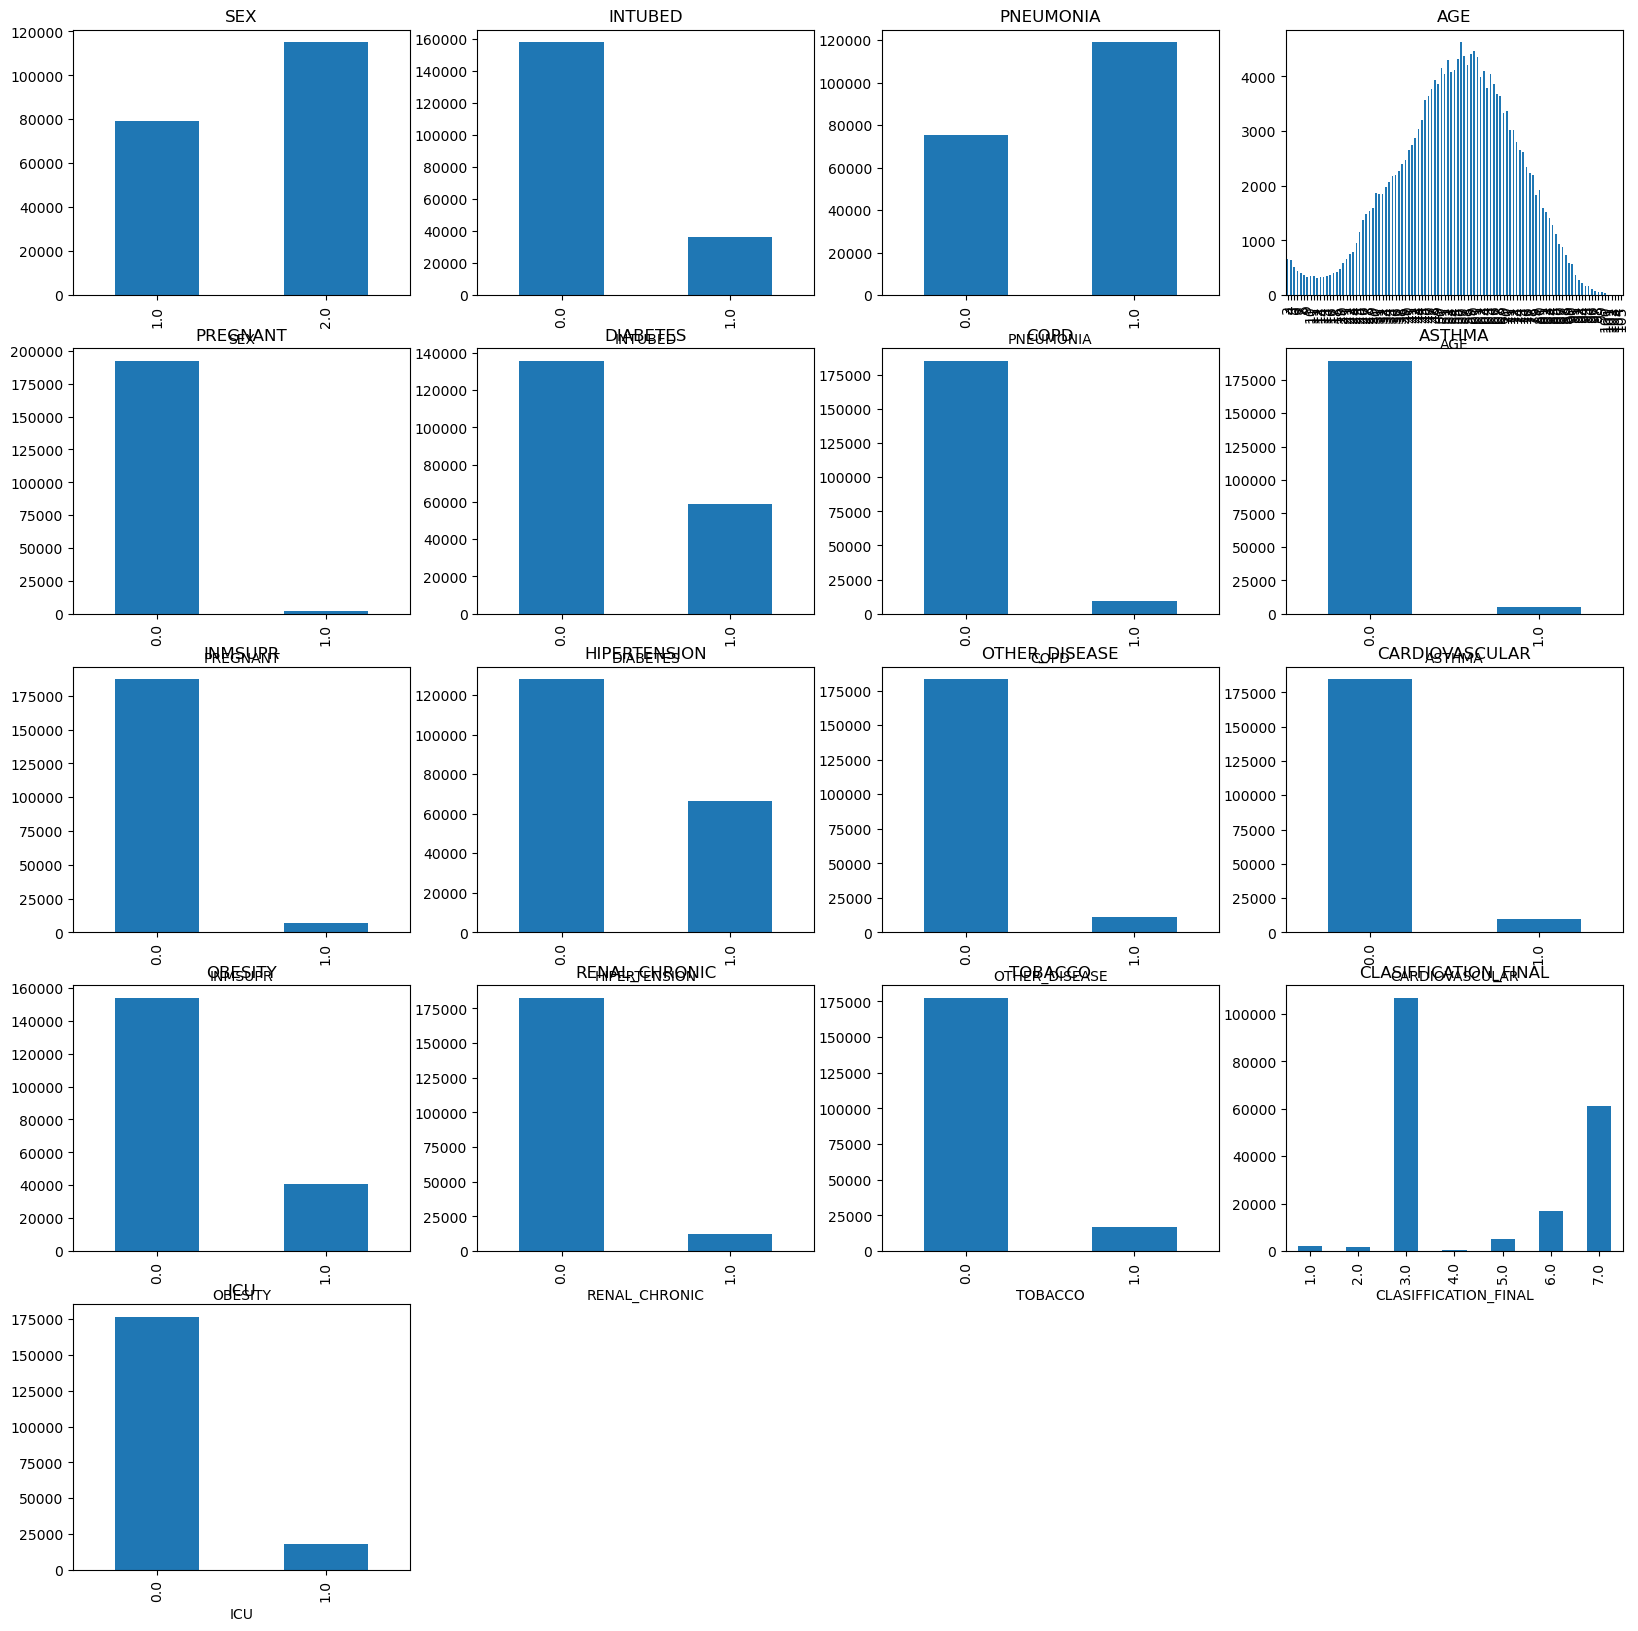

In [163]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df, columns=new_column_list, figsize=(20, 20))

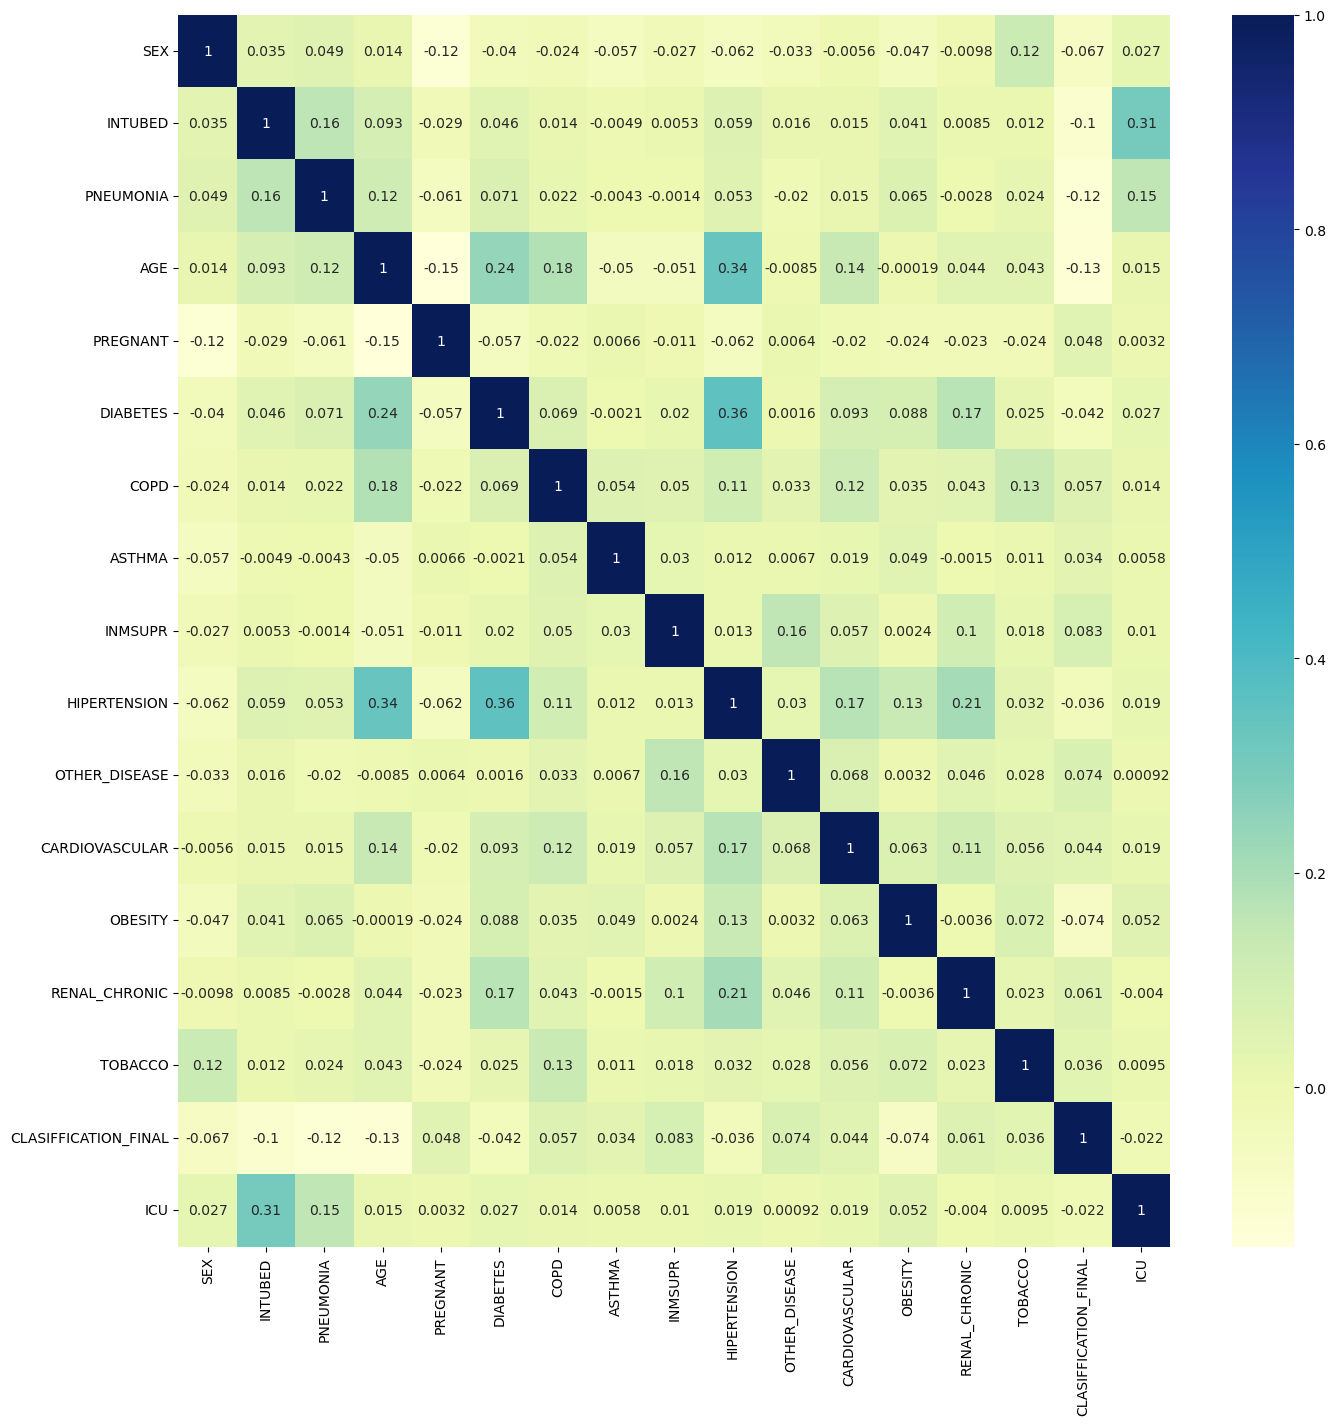

In [164]:
plt.figure(figsize=(16, 16))
co_mtx = analytics_df.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

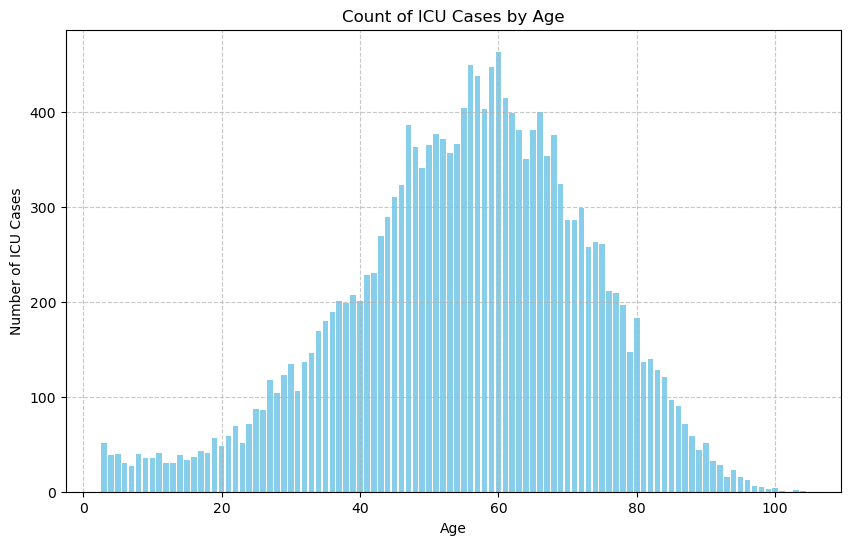

In [165]:
icu_by_age = analytics_df[analytics_df['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### III/ Model

In [166]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import modules.modeling as md
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score


# Discretize features into bins (e.g., 5 bins)
y = analytics_df['ICU']
X = analytics_df.drop(['ICU', 'CLASIFFICATION_FINAL'], axis=1)

analytics_df = analytics_df.drop(['CLASIFFICATION_FINAL'], axis=1)
# analytics_df['AGE'] = pd.cut(analytics_df['AGE'], bins=10, labels=False)


In [167]:
from collections import Counter

occurence = []
count = 0
occurence = occurence + md.feature_selection_coefficient(df=analytics_df, target_column='ICU', select_k_best=7)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_mutual_info(df=analytics_df, target_column='ICU', select_k_best=7)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_anova(df=analytics_df, target_column='ICU', select_k_best=7)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_chi2(df=analytics_df, target_column='ICU', continuous_columns=[], select_k_best=7)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_rfe(df=analytics_df, target_column='ICU', select_k_best=7)
count = count + 1
print('-' * 100)
select_feature_probability = dict(Counter(occurence))
select_feature_probability = {k:float(v/count) for k, v in select_feature_probability.items()}
print(select_feature_probability)

Correlations with target:
INTUBED           0.307864
PNEUMONIA         0.153503
OBESITY           0.051905
SEX               0.027343
DIABETES          0.026657
CARDIOVASCULAR    0.019496
HIPERTENSION      0.018897
AGE               0.015480
COPD              0.013944
INMSUPR           0.010276
TOBACCO           0.009495
ASTHMA            0.005786
PREGNANT          0.003193
OTHER_DISEASE     0.000925
RENAL_CHRONIC    -0.003966
dtype: float64
Top 7 features: ['INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES', 'CARDIOVASCULAR', 'HIPERTENSION']
----------------------------------------------------------------------------------------------------
Mutual Information Scores:
PNEUMONIA         0.042754
INTUBED           0.039105
SEX               0.028608
HIPERTENSION      0.011417
DIABETES          0.009977
OBESITY           0.005755
TOBACCO           0.001376
CARDIOVASCULAR    0.001324
AGE               0.000789
OTHER_DISEASE     0.000445
RENAL_CHRONIC     0.000403
INMSUPR           0.0000

In [168]:
# ['SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'INMSUPR', 'OBESITY']
# 0.005769 
analytics_df = analytics_df[['INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES', 'HIPERTENSION', 'CARDIOVASCULAR','ICU']]
y = analytics_df['ICU']
X = analytics_df.drop(['ICU'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                        , test_size=0.3
                                                        , random_state=42
                                                        , stratify=y)

X_over_train, X_over_test, y_over_train, y_over_test = md.generate_train_test_over_set(df=analytics_df, target_column='ICU', test_size=0.3)
print('-' * 50)
X_under_train, X_under_test, y_under_train, y_under_test = md.generate_train_test_under_set(df=analytics_df, target_column='ICU', test_size=0.3)

X_train shape: (136040, 7)
X_test shape: (58303, 7)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying SMOTE: (247484, 7)
y_train shape after applying SMOTE: (247484,)
--------------------------------------------------
X_train shape: (136040, 7)
X_test shape: (58303, 7)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying Tomek Links: (24596, 7)
y_train shape after applying Tomek Links: (24596,)


<Axes: title={'center': 'ICU'}, xlabel='ICU'>

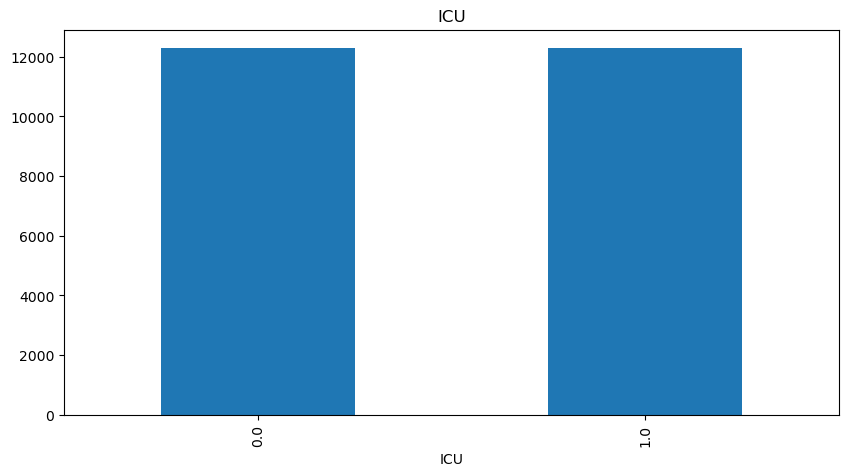

In [169]:
y_under_train.value_counts(dropna=False).sort_index().plot(kind='bar', title='ICU', figsize=(10, 5))

In [170]:
# Initialize and fit model
model = LogisticRegression(solver='liblinear', class_weight={0:1, 1:5}, random_state=42)  # Increase max_iter if convergence issues
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Coefficients
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print("Coefficients:\n", coef_df)

# Cross-validation (using 5-fold by default)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

# Detailed cross-validation metrics
scoring = ['precision', 'recall', 'f1', 'roc_auc']  # Metrics for class 1 (ICU admitted)
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

# Print mean and std for each metric
print("\nCross-Validation Detailed Metrics (for class 1: ICU admitted):")
print("Mean Precision:", cv_results['test_precision'].mean())
print("Precision Std:", cv_results['test_precision'].std())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Recall Std:", cv_results['test_recall'].std())
print("Mean F1-Score:", cv_results['test_f1'].mean())
print("F1-Score Std:", cv_results['test_f1'].std())
print("Mean ROC AUC:", cv_results['test_roc_auc'].mean())
print("ROC AUC Std:", cv_results['test_roc_auc'].std())

# Overall test set metrics for class 1
print("\nOverall Test Set Metrics (for class 1: ICU admitted):")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

print('-' * 50)

Accuracy: 0.8529921273347855
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     53033
         1.0       0.31      0.51      0.39      5270

    accuracy                           0.85     58303
   macro avg       0.63      0.70      0.65     58303
weighted avg       0.89      0.85      0.87     58303

Coefficients:
          Variable  Coefficient
0         INTUBED     1.870520
1       PNEUMONIA     1.045929
2         OBESITY     0.305831
3             SEX     0.097665
4        DIABETES     0.089682
5    HIPERTENSION    -0.071525
6  CARDIOVASCULAR     0.204326

Cross-Validation Accuracy Scores: [0.85309468 0.85294766 0.85335196 0.85419729 0.8565863 ]
Mean CV Accuracy Score: 0.8540355777712438
Standard Deviation of CV Scores: 0.001346738177898669

Cross-Validation Detailed Metrics (for class 1: ICU admitted):
Mean Precision: 0.313857723173493
Precision Std: 0.004426864438513224
Mean Recall: 0.5182130683039242
Re

In [174]:
# Initialize and fit model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues
model.fit(X_over_train, y_over_train)

# Predictions
y_pred = model.predict(X_over_test)
y_prob = model.predict_proba(X_over_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate
print("Accuracy:", accuracy_score(y_over_test, y_pred))
print("Classification Report:\n", classification_report(y_over_test, y_pred))

# Coefficients
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print("Coefficients:\n", coef_df)

# Cross-validation (using 5-fold by default)
cv_scores = cross_val_score(model, X_over_train, y_over_train, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

# Detailed cross-validation metrics
scoring = ['precision', 'recall', 'f1', 'roc_auc']  # Metrics for class 1 (ICU admitted)
cv_results = cross_validate(model, X_over_train, y_over_train, cv=5, scoring=scoring)

# Print mean and std for each metric
print("\nCross-Validation Detailed Metrics (for class 1: ICU admitted):")
print("Mean Precision:", cv_results['test_precision'].mean())
print("Precision Std:", cv_results['test_precision'].std())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Recall Std:", cv_results['test_recall'].std())
print("Mean F1-Score:", cv_results['test_f1'].mean())
print("F1-Score Std:", cv_results['test_f1'].std())
print("Mean ROC AUC:", cv_results['test_roc_auc'].mean())
print("ROC AUC Std:", cv_results['test_roc_auc'].std())

# Overall test set metrics for class 1
print("\nOverall Test Set Metrics (for class 1: ICU admitted):")
print("Precision:", precision_score(y_over_test, y_pred))
print("Recall:", recall_score(y_over_test, y_pred))
print("F1-Score:", f1_score(y_over_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_over_test, y_prob))
print('-' * 50)

Accuracy: 0.8210212167469941
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     53033
         1.0       0.27      0.56      0.36      5270

    accuracy                           0.82     58303
   macro avg       0.61      0.71      0.63     58303
weighted avg       0.89      0.82      0.85     58303

Coefficients:
          Variable  Coefficient
0         INTUBED     1.876821
1       PNEUMONIA     1.025903
2         OBESITY     0.308225
3             SEX     0.095638
4        DIABETES     0.100930
5    HIPERTENSION    -0.062278
6  CARDIOVASCULAR     0.158674

Cross-Validation Accuracy Scores: [0.70925511 0.71299271 0.70955816 0.71139665 0.7162397 ]
Mean CV Accuracy Score: 0.7118884628955133
Standard Deviation of CV Scores: 0.0025596627068658058

Cross-Validation Detailed Metrics (for class 1: ICU admitted):
Mean Precision: 0.7906524307275806
Precision Std: 0.003290683301355467
Mean Recall: 0.5763928464704658


In [ ]:
# Initialize and fit model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues
model.fit(X_under_train, y_under_train)

# Predictions
y_pred = model.predict(X_under_test)
y_prob = model.predict_proba(X_under_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate
print("Accuracy:", accuracy_score(y_under_test, y_pred))
print("Classification Report:\n", classification_report(y_under_test, y_pred))

# Coefficients
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print("Coefficients:\n", coef_df)

# Cross-validation (using 5-fold by default)
cv_scores = cross_val_score(model, X_under_train, y_under_train, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

# Detailed cross-validation metrics
scoring = ['precision', 'recall', 'f1', 'roc_auc']  # Metrics for class 1 (ICU admitted)
cv_results = cross_validate(model, X_under_train, y_under_train, cv=5, scoring=scoring)

# Print mean and std for each metric
print("\nCross-Validation Detailed Metrics (for class 1: ICU admitted):")
print("Mean Precision:", cv_results['test_precision'].mean())
print("Precision Std:", cv_results['test_precision'].std())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Recall Std:", cv_results['test_recall'].std())
print("Mean F1-Score:", cv_results['test_f1'].mean())
print("F1-Score Std:", cv_results['test_f1'].std())
print("Mean ROC AUC:", cv_results['test_roc_auc'].mean())
print("ROC AUC Std:", cv_results['test_roc_auc'].std())

# Overall test set metrics for class 1
print("\nOverall Test Set Metrics (for class 1: ICU admitted):")
print("Precision:", precision_score(y_under_test, y_pred))
print("Recall:", recall_score(y_under_test, y_pred))
print("F1-Score:", f1_score(y_under_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_under_test, y_prob))
print('-' * 50)

Accuracy: 0.09038985986998954
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     53033
         1.0       0.09      1.00      0.17      5270

    accuracy                           0.09     58303
   macro avg       0.05      0.50      0.08     58303
weighted avg       0.01      0.09      0.01     58303

Coefficients:
          Variable  Coefficient
0         INTUBED     1.834243
1       PNEUMONIA     1.021798
2         OBESITY     0.305097
3             SEX     0.068066
4        DIABETES     0.129884
5    HIPERTENSION    -0.052223
6  CARDIOVASCULAR     0.243212

Cross-Validation Accuracy Scores: [0.5        0.49989835 0.49989835 0.50010165 0.50010165]
Mean CV Accuracy Score: 0.5
Standard Deviation of CV Scores: 9.091555102660665e-05


/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le


Cross-Validation Detailed Metrics (for class 1: ICU admitted):
Mean Precision: 0.5
Precision Std: 9.091555102660665e-05
Mean Recall: 1.0
Recall Std: 0.0
Mean F1-Score: 0.6666666617685112
F1-Score Std: 8.081382354299363e-05
Mean ROC AUC: 0.7673767319703122
ROC AUC Std: 0.004392913053801585

Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.09038985986998954
Recall: 1.0
F1-Score: 0.16579365453887657
ROC AUC Score: 0.7645964341918646
--------------------------------------------------
